In [420]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [400]:
data_list = []
with open('UCI HAR Dataset\\train\\X_train.txt', 'r') as data:
    for line in data:
        data_list.append(line.split())


In [401]:
X_train = pd.DataFrame(data_list)

In [427]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: object(561)
memory usage: 31.5+ MB


In [426]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


In [423]:
X_train.isna().any().value_counts()

False    561
dtype: int64

In [402]:
labels = open('UCI HAR Dataset\\train\\y_train.txt', 'r').read().split()

In [403]:
pd.DataFrame(labels).value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

In [404]:
stats = []
cluster_range = range(2, 16)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=99)
    kmeans.fit(X_train)
    stats.append(kmeans.inertia_)

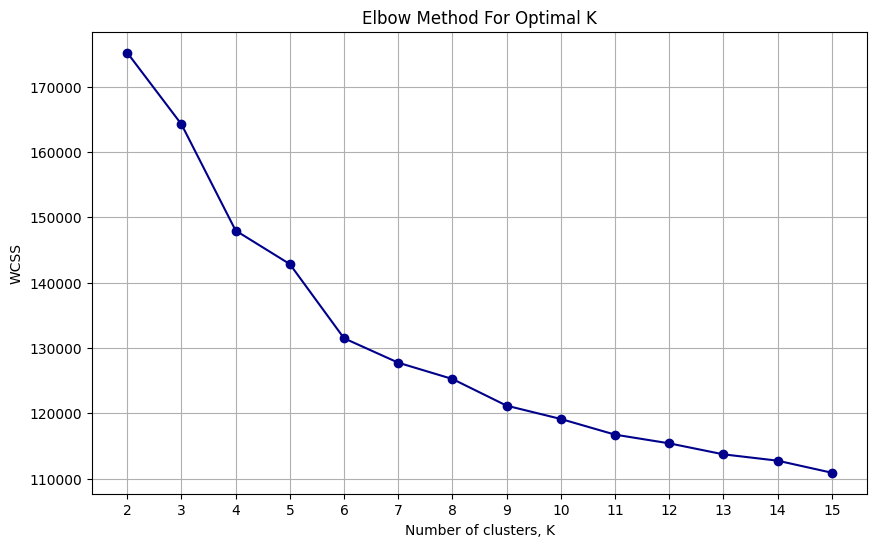

In [419]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, stats, '-o', color='darkblue')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig('kmeans_elbow.png')
plt.show()

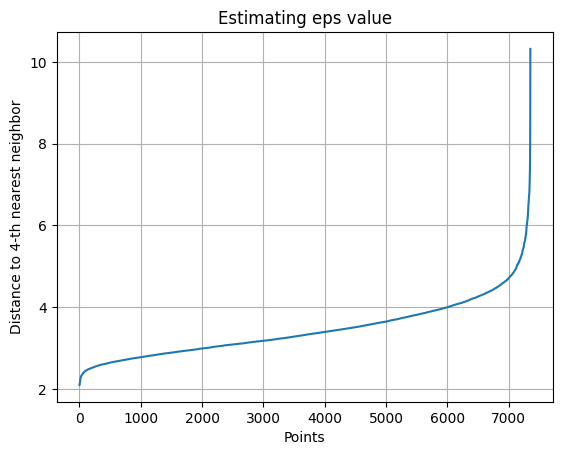

In [336]:
min_samples = 4

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(X_train)
distances, indices = nearest_neighbors.kneighbors(X_train)

# Sort distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.title('Estimating eps value')
plt.grid(True)
plt.savefig('estimate_eps.png')
plt.show()

In [283]:
def search_dbscan(eps_range, min_sample_range, data):

    stats_dbscan = []

    for i in eps_range:
        for j in min_sample_range:

            print('Params: eps:' + str(i/10) + ' min_sample:' + str(j))

            dbscan = DBSCAN(eps=i/10, min_samples=j)
            dbscan.fit(data)

            dbscan_labels = dbscan.labels_
            n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            n_noise_ = list(dbscan_labels).count(-1)

            arc = adjusted_rand_score(labels, dbscan_labels)

            stats_dbscan.append((i/10, j, n_clusters_, n_noise_, arc))
            
    x = pd.DataFrame(stats_dbscan)
    x.columns = ['eps', 'min_samples', 'n_clusters', 'n_noise', 'arc']
    return x.sort_values('arc', ascending=False)

In [271]:
results = search_dbscan(range(40, 60, 5), range(3, 16, 1), X_train)
print(results.head(10))

    eps  min_samples  n_clusters  n_noise       arc
19  4.5            9           3      489  0.324894
20  4.5           10           3      499  0.324852
18  4.5            8           4      463  0.324659
22  4.5           12           3      538  0.324479
21  4.5           11           3      523  0.324464
23  4.5           13           4      555  0.324134
24  4.5           14           3      579  0.323727
25  4.5           15           3      599  0.323440
8   4.0           11          10     1486  0.313544
6   4.0            9          16     1379  0.312432


In [289]:
dbscan = DBSCAN(eps=4.5, min_samples=9)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_
print(pd.DataFrame(dbscan_labels).value_counts())

 0    3853
 1    2977
-1     489
 2      33
dtype: int64


In [ ]:
db_results = pd.DataFrame()
eps_range = range(35, 60, 1)
min_samples_range = range(3, 30, 2)

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    print('p = ' + str(p) + ' starting')
    pca = PCA(n_components=p)
    X_pca = pca.fit_transform(X_train)
    results = search_dbscan(eps_range, min_samples_range, X_pca)
    results['pca'] = p
    db_results = db_results.append(results)

In [292]:
db_results.sort_values('arc', ascending=False).head(10)

,eps,min_samples,n_clusters,n_noise,arc,pca
27,3.6,29,2,167,0.329540,30
10,3.5,23,2,176,0.329437,30
11,3.5,25,2,187,0.329092,30
56,3.9,3,4,60,0.329012,50
42,3.8,3,5,69,0.328887,50
12,3.5,27,2,196,0.328827,30
13,3.5,29,2,199,0.328786,30
57,3.9,5,4,85,0.328549,50
78,4.0,19,2,175,0.328446,50
58,3.9,7,3,110,0.328368,50


In [294]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_train)
dbscan = DBSCAN(eps=3.6, min_samples=29)
dbscan.fit(X_pca)
dbscan_labels = dbscan.labels_
print(pd.DataFrame(dbscan_labels).value_counts())

 0    4008
 1    3175
-1     169
dtype: int64


In [ ]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_train)
results = search_dbscan(eps_range, min_samples_range, X_tsne)

In [373]:
results.head(10)

,eps,min_samples,n_clusters,n_noise,arc
12,3.5,27,22,274,0.564423
13,3.5,29,23,314,0.560639
8,3.5,19,18,51,0.520185
9,3.5,21,19,68,0.519675
10,3.5,23,22,110,0.510308
11,3.5,25,21,165,0.508312
27,3.6,29,20,245,0.350368
152,4.5,27,9,31,0.324274
153,4.5,29,9,32,0.324229
57,3.9,5,11,5,0.320046


In [379]:
dbscan = DBSCAN(eps=3.5, min_samples=27)
dbscan.fit(X_tsne)
dbscan_labels = dbscan.labels_
print(pd.DataFrame(dbscan_labels).value_counts())

 0     2535
 3     1456
 1     1273
 5      474
 4      311
-1      274
 9      115
 7       99
 2       95
 18      88
 6       84
 21      65
 12      59
 14      54
 20      53
 17      52
 10      52
 13      45
 11      41
 19      37
 15      32
 16      30
 8       28
dtype: int64


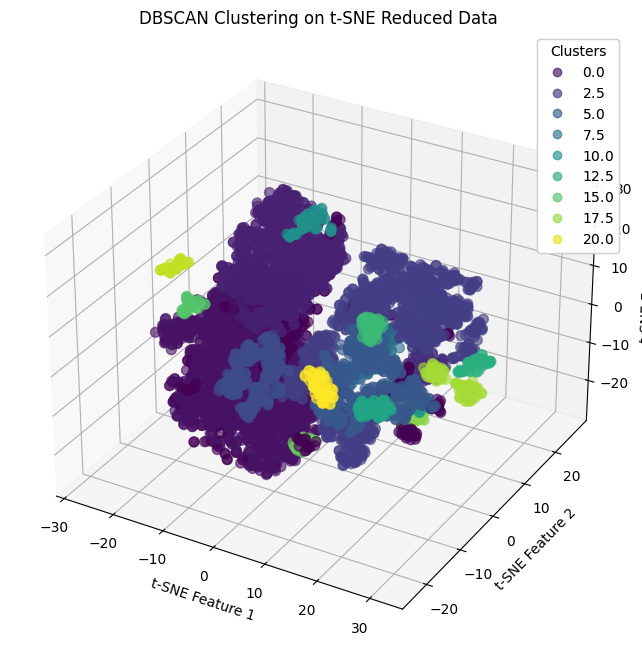

In [390]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)

ax.set_title('DBSCAN Clustering on t-SNE Reduced Data')
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

plt.savefig('tsne_dbscan_3_3.5_27_3D.png')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [392]:
tsne = TSNE(n_components=2)
X_tsne_2D = tsne.fit_transform(X_train)

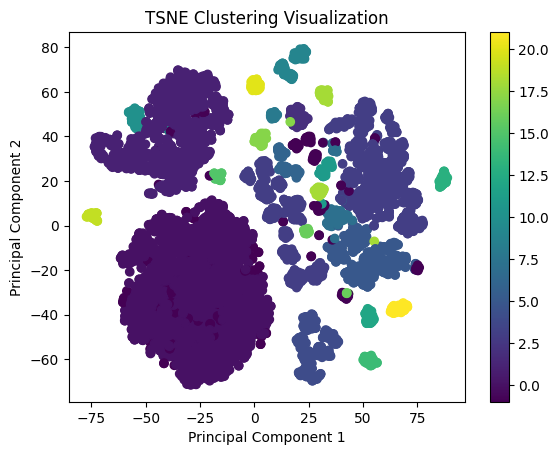

In [394]:
plt.scatter(X_tsne_2D[:, 0], X_tsne_2D[:, 1], c=dbscan_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE Clustering Visualization')
plt.colorbar()
plt.savefig('tsne_dbscan_3.5_27_2D.png')
plt.show()

In [303]:
stats = []

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    cluster_range = range(2, 16)
    pca = PCA(n_components=p)
    X_pca = pca.fit_transform(X_train)
    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, random_state=99)
        kmeans.fit(X_pca)
        stats.append([kmeans.inertia_, i, p])

In [304]:
stats_df = pd.DataFrame(stats)
stats_df.columns = ['inertia', 'n_clusters', 'pca']

In [351]:
colors = {
  250: '#000080',
  150: '#0000ff',
  100: '#0080ff',
  75: '#16ffe1',
  50: '#7dff7a',
  30: '#e4ff13',
  15: '#ff9400',
  9: '#ff1e00',
  5: '#800000'
}

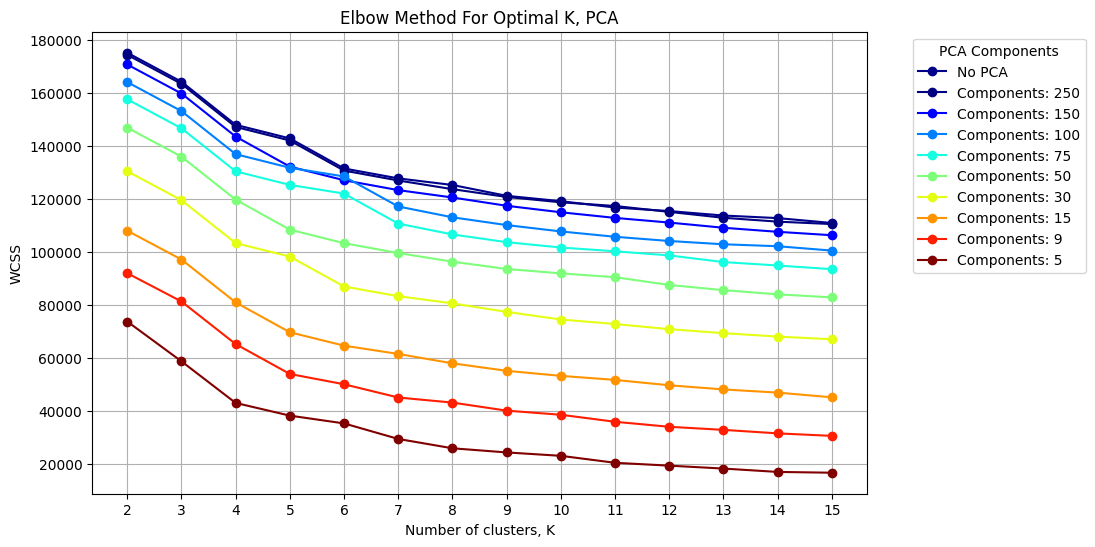

In [418]:
plt.figure(figsize=(10, 6))
#plt.plot(cluster_range, stats, '-o', color='darkblue')

plt.plot(cluster_range, stats, '-o', color='darkblue', label=f'No PCA')

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    plt.plot(cluster_range, stats_df[stats_df['pca']==p]['inertia'], '-o', color=colors[p], label=f'Components: {p}')

plt.title('Elbow Method For Optimal K, PCA')
plt.xlabel('Number of clusters, K')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.legend(title="PCA Components", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('kmeans_elbow_PCA.png')
plt.show()

In [411]:
pca = PCA(n_components=250)
X_pca = pca.fit_transform(X_train)
kmeans = KMeans(n_clusters=6, random_state=99)
kmeans.fit(X_pca)
labels_250_6 = kmeans.labels_

In [412]:
pca_display = PCA(n_components=3)
X_pca_diaplay = pca.fit_transform(X_train)

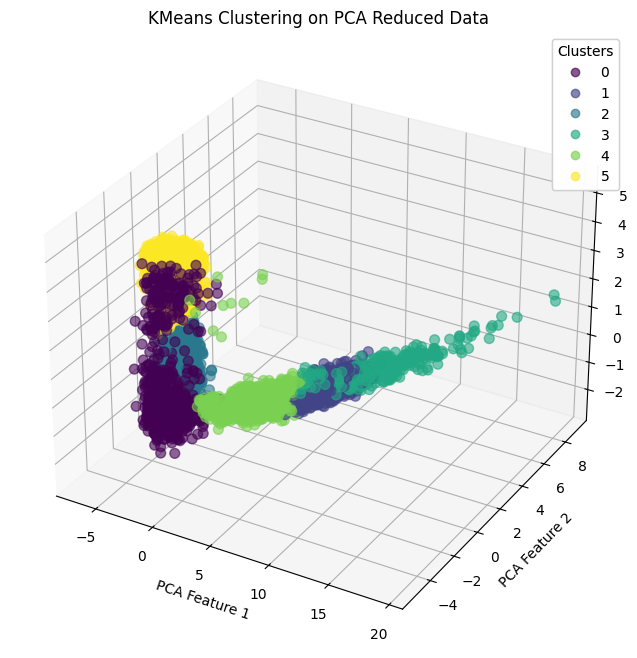

In [413]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_diaplay[:, 0], X_pca_diaplay[:, 1], X_pca_diaplay[:, 2], c=labels_250_6, cmap='viridis', s=50, alpha=0.6)

ax.set_title('KMeans Clustering on PCA Reduced Data')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')

plt.savefig('pca_kmeans_250_6_3D.png')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [414]:
pca_display = PCA(n_components=2)
X_pca_diaplay = pca.fit_transform(X_train)

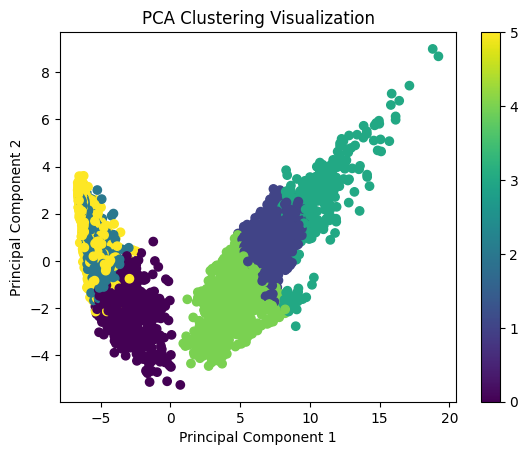

In [415]:
plt.scatter(X_pca_diaplay[:, 0], X_pca_diaplay[:, 1], c=labels_250_6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering Visualization')
plt.colorbar()
plt.savefig('pca_kmeans_250_6_2D.png')
plt.show()

In [395]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_train)

In [396]:
stats_tsne = []
cluster_range = range(2, 16)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=99)
    kmeans.fit(X_tsne)
    stats_tsne.append([kmeans.inertia_, i, p])

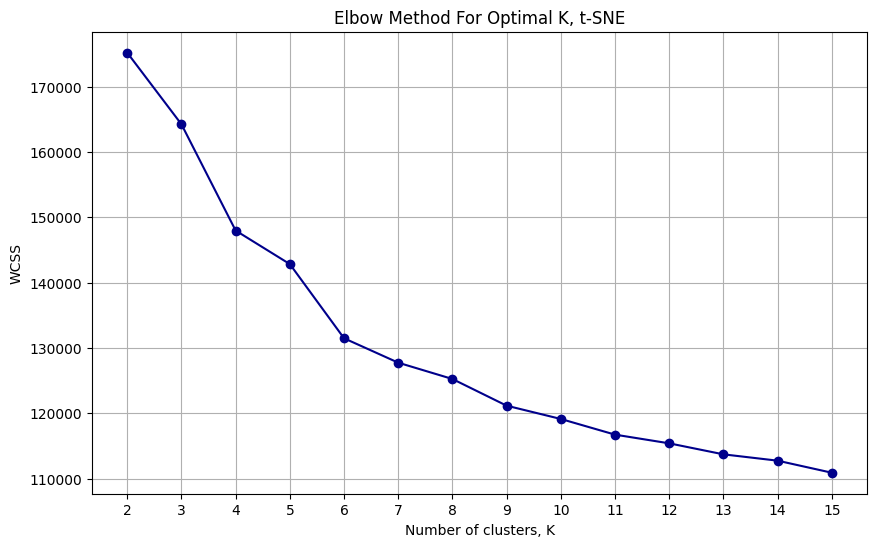

In [417]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, stats, '-o', color='darkblue', label=f'No PCA')
plt.title('Elbow Method For Optimal K, t-SNE')
plt.xlabel('Number of clusters, K')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig('kmeans_elbow_tsne.png')
plt.show()

In [406]:
kmeans = KMeans(n_clusters=6, random_state=99)
kmeans.fit(X_tsne)
labels_tsne_6 = kmeans.labels_

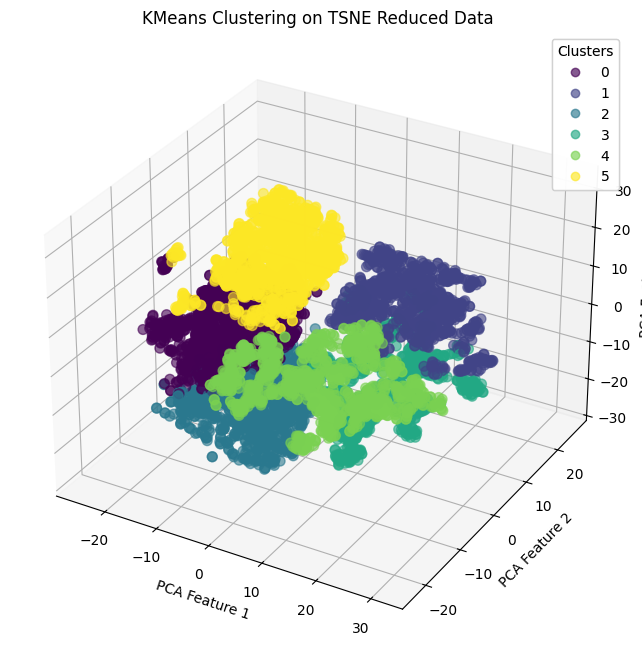

In [410]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels_tsne_6, cmap='viridis', s=50, alpha=0.6)

ax.set_title('KMeans Clustering on TSNE Reduced Data')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')

plt.savefig('tsne_kmeans_6_3D.png')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

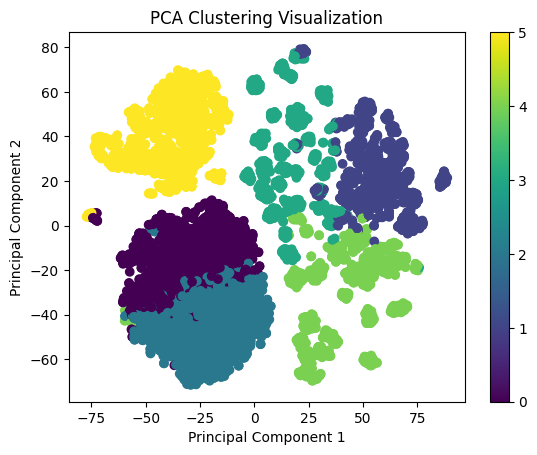

In [416]:
plt.scatter(X_tsne_2D[:, 0], X_tsne_2D[:, 1], c=labels_tsne_6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering Visualization')
plt.colorbar()
plt.savefig('tsne_kmeans_6_2D.png')
plt.show()